# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


---

Sumber Dataset: https://www.kaggle.com/datasets/adityakadiwal/water-potability  
Dataset Water Quality / Water Potability berisi data kualitas air dari 3276 badan air yang berbeda. Dataset ini digunakan untuk mengevaluasi dan memprediksi kelayakan air minum, dengan target utama Potability, di mana nilai 1 menunjukkan air layak diminum dan 0 menunjukkan air tidak layak diminum

---

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [14]:
# Import library
from logging import warning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [15]:
#Load Dataset
df = pd.read_csv("../water_potability_raw/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [16]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [17]:
# Mengecek missing value
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [18]:
# Mengecek duplikat
df.duplicated().sum()

np.int64(0)

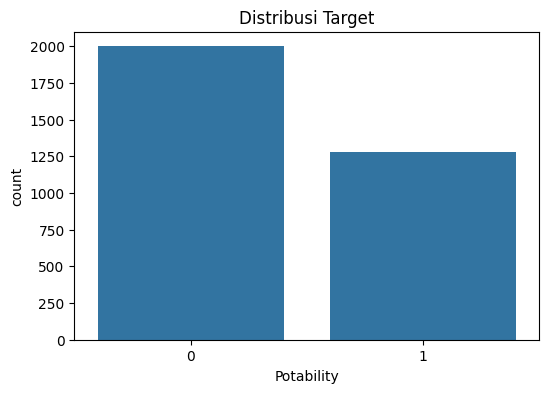

In [19]:
# Mengecek distribusi target (Potability)
plt.figure(figsize=(6, 4))
sns.countplot(x="Potability", data=df)
plt.title("Distribusi Target")
plt.show()

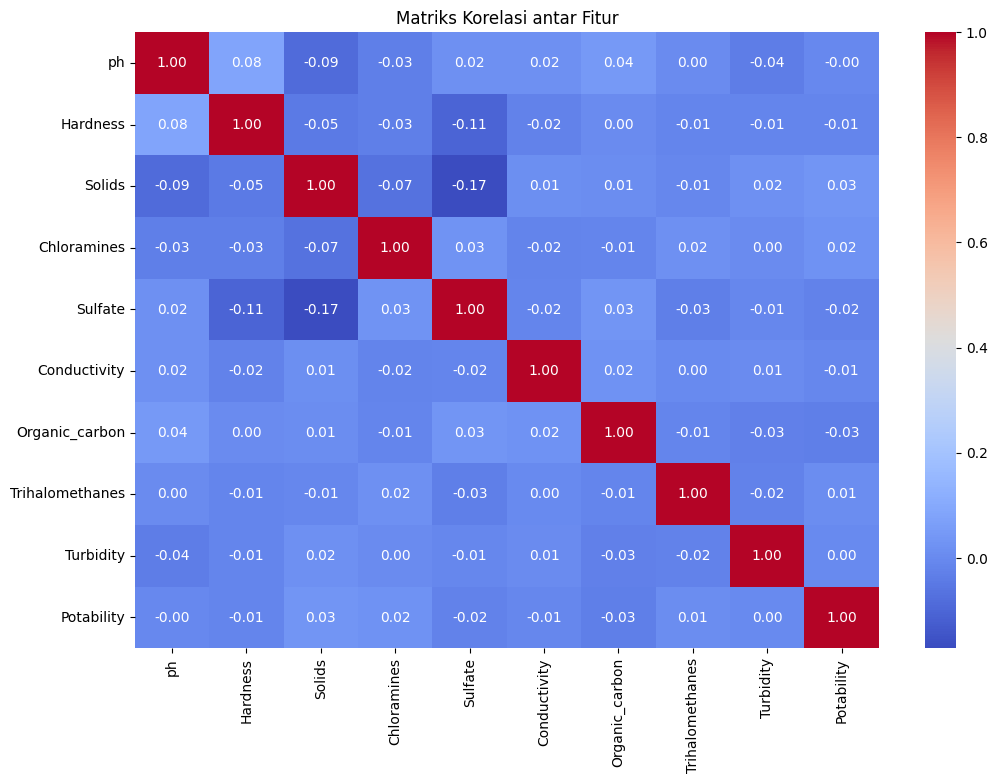

In [20]:
# Mengecek korelasi antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi antar Fitur")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [21]:
# Memisahkan antara fitur dan target
X = df.drop("Potability", axis=1)
y = df["Potability"]

print("X: ", X.shape)
print("y: ", y.shape)

X:  (3276, 9)
y:  (3276,)


In [22]:
# Membagi menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train: ", X_train.shape)
print("Test: ", X_test.shape)

Train:  (2620, 9)
Test:  (656, 9)


In [23]:
# Menangani missing values
imputer = SimpleImputer(strategy="mean")

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [24]:
# Standarisasi
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [25]:
# Konversi ke dataframe
X_train_final = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_final = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

X_train_final.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2214,0.500030,0.371295,0.048040,-0.791809,2.046406,0.925183,0.565242,-0.364030,-0.177457
1634,-0.714789,0.935084,-1.016080,0.850917,1.611850,-1.501693,-2.169448,-1.580061,-0.486502
2605,0.923825,0.980710,0.808192,-0.585714,0.000000,-0.818137,0.085404,-0.350210,0.547202
114,-0.233045,0.671248,-0.001853,0.030738,0.000000,-0.677955,0.774861,0.503002,-0.091554
129,-0.395572,0.176673,-0.548156,-0.571875,-0.202209,0.665479,0.686438,-1.262479,-0.544746


In [26]:
# Ekspor data
X_train_final.to_csv("water_potability_preprocessing/train_potability.csv", index=False)
X_test_final.to_csv("water_potability_preprocessing/test_potability.csv", index=False)